In [1]:
# from https://gitlab.com/harvard-machine-learning/double-descent/-/blob/master/intro_resnet_plot.ipynb

import numpy as np
import pylab as plt
import pandas as pd
import tensorflow as tf
import pickle

def gload(gsname):
    with tf.io.gfile.GFile(gsname, "rb") as file:
        obj = pickle.load(file)
    return obj

def load_precomp(basedir):
    Ms = gload(f'{basedir}/Mlist')
    ks = gload(f'{basedir}/ks')
    return Ms, ks

def load(name):
    return load_precomp(f'gs://hml-public/dd/{name}')

Ms, ks = load('cifar10-resnet18k-p15-adam-reps')

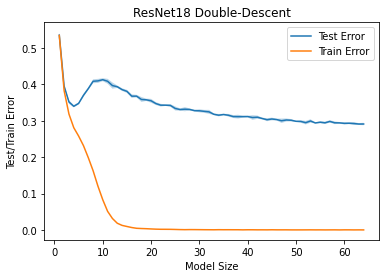

In [3]:
 ## data format:
## Ms[i]['Test Error'][s, epoch] : Test Error of model of size s, at epoch. For trial i (of 5 trials).

errs = np.array([M['Test Error'][:, -1] for M in Ms])

p = 0.15 # fraction of noise
errs = 1.0 - (1-p)*(1-errs) + errs*p/9.0 # remap clean test error --> noisy test error.

stds = np.std(errs, axis=0)
mean = np.mean(errs, axis=0)
train_err = np.mean([M['Train Error'][:, -1] for M in Ms], axis=0)


fig, ax = plt.subplots()
ax.plot(ks, mean, label='Test Error')
ax.plot(ks, train_err, label='Train Error')
ax.fill_between(ks, mean-stds, mean+stds ,alpha=0.3)
ax.set_xlabel("Model Size")
ax.set_ylabel("Test/Train Error")
ax.set_title("ResNet18 Double-Descent")
ax.legend() 

In [9]:
pd.DataFrame(
    {"model_size": ks,
     "train_err": train_err,
     "test_err": mean
    }
).to_csv("double_descent.csv", index=False)